# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### jay notes - assignments to look at
* api day 2, #5 airport_ratings

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a skeleton dataframe with the cities list. 
# Add columns for: City, Lat, Lng, Max, Temp, Humidity, Cloudiness, Wind, Speed, Country, Date
# Create a dataframe with the Cities list adn then append that datafame with new empty columns desired

df = pd.DataFrame(cities)
df["Latitude"] = ""
df["Longitude"] = ""
df["Max Temp (F)"] = ""
df["Humidity"] = ""
df["Cloud Coverage"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Datetime"] = ""

# rename the column name '0' as 'City'
df.rename(columns={0 : 'City'}, inplace=True)

In [4]:
# use the following site to pull the calls https://openweathermap.org/current
# api call url - api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
# create a shell df with columns for City Lat Lng Max Temp Humidity Cloudiness Wind Speed Country Date
# option1 - create shell lists for each of the columns then combine then below into a df
# option2 - figure out how to populate dataframe with the for loop method using .iterrows() 
city_num = 1

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Using option 2 - I wanted to test using .iterrows() to populate the data frame skeleton I created above
for index, row in df.iterrows():
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={row['City']}&appid={weather_api_key}&units=imperial"
    query_data = requests.get(base_url).json()
    
    try:
        print(f"Processing record {city_num} out of {len(cities)} | {row['City']} | {query_data['main']['temp']}")
        
        df.loc[index, 'Latitude'] = query_data['coord']['lat']
        df.loc[index, 'Longitude'] = query_data['coord']['lon']
        df.loc[index, 'Max Temp (F)'] = query_data['main']['temp_max']
        df.loc[index, 'Humidity'] = query_data['main']['humidity']
        df.loc[index, 'Cloud Coverage'] = query_data['clouds']['all']
        df.loc[index, 'Wind Speed'] = query_data['wind']['speed']
        df.loc[index, 'Country'] = query_data['sys']['country']
        df.loc[index, 'Datetime'] = query_data['dt']
        
        city_num += 1     
    except:
        print("City not found.")
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 out of 582 | port hardy | 55.4
Processing record 2 out of 582 | fairbanks | 64.42
Processing record 3 out of 582 | fort-shevchenko | 87.4
Processing record 4 out of 582 | khatanga | 65.34
Processing record 5 out of 582 | omboue | 72.45
Processing record 6 out of 582 | hilo | 69.46
Processing record 7 out of 582 | bluff | 48.56
Processing record 8 out of 582 | punta arenas | 32
Processing record 9 out of 582 | qaanaaq | 43.03
Processing record 10 out of 582 | albany | 72.28
Processing record 11 out of 582 | thompson | 66.2
Processing record 12 out of 582 | mataura | 42.3
Processing record 13 out of 582 | manokwari | 84.11
Processing record 14 out of 582 | jeremie | 80.26
Processing record 15 out of 582 | carnarvon | 77
Processing record 16 out of 582 | hualmay | 60.4
Processing record 17 out of 582 | ushuaia | 33.8
City not found.
Processing record 18 out of 582 | longyearbyen | 44.

Processing record 155 out of 582 | san cristobal | 65.16
City not found.
Processing record 156 out of 582 | zhigansk | 63.7
Processing record 157 out of 582 | strezhevoy | 69.8
Processing record 158 out of 582 | jardim | 74.08
Processing record 159 out of 582 | warman | 57.2
Processing record 160 out of 582 | wagar | 82.51
Processing record 161 out of 582 | avarua | 68
City not found.
Processing record 162 out of 582 | eyl | 84.29
City not found.
Processing record 163 out of 582 | cumra | 71.6
Processing record 164 out of 582 | ladario | 74.14
Processing record 165 out of 582 | samarai | 79.21
Processing record 166 out of 582 | port lincoln | 58.05
Processing record 167 out of 582 | jamestown | 62.24
Processing record 168 out of 582 | pevek | 51.22
Processing record 169 out of 582 | shache | 85.6
Processing record 170 out of 582 | sabha | 75.72
Processing record 171 out of 582 | sabang | 83.97
Processing record 172 out of 582 | katobu | 84.45
Processing record 173 out of 582 | mahebour

Processing record 310 out of 582 | katangli | 57.04
Processing record 311 out of 582 | aklavik | 57.2
Processing record 312 out of 582 | dali | 67.08
Processing record 313 out of 582 | tonj | 70.07
Processing record 314 out of 582 | duvan | 73.06
Processing record 315 out of 582 | eyrarbakki | 49.48
Processing record 316 out of 582 | vostok | 71.38
Processing record 317 out of 582 | necochea | 35.01
City not found.
Processing record 318 out of 582 | mokhsogollokh | 95.52
Processing record 319 out of 582 | chepareria | 63.14
Processing record 320 out of 582 | tromso | 51.8
Processing record 321 out of 582 | antofagasta | 57.2
Processing record 322 out of 582 | okhotsk | 67.28
Processing record 323 out of 582 | nouadhibou | 73.4
Processing record 324 out of 582 | fortuna | 57.29
Processing record 325 out of 582 | sosua | 81
Processing record 326 out of 582 | shelburne | 60.93
Processing record 327 out of 582 | palafrugell | 68.31
Processing record 328 out of 582 | chimbote | 60.58
Proces

Processing record 464 out of 582 | ilulissat | 44.6
City not found.
Processing record 465 out of 582 | nikaia | 79.81
Processing record 466 out of 582 | grand gaube | 73.99
Processing record 467 out of 582 | pedernales | 80.92
Processing record 468 out of 582 | saint anthony | 70.63
Processing record 469 out of 582 | isoka | 55.6
Processing record 470 out of 582 | orlik | 75.06
Processing record 471 out of 582 | agara | 69.26
City not found.
Processing record 472 out of 582 | dutlwe | 36.36
Processing record 473 out of 582 | mogadishu | 78.42
Processing record 474 out of 582 | newport | 57.76
City not found.
Processing record 475 out of 582 | airai | 71.26
Processing record 476 out of 582 | juybar | 80.6
City not found.
Processing record 477 out of 582 | santa flavia | 77.43
Processing record 478 out of 582 | shenjiamen | 81.09
Processing record 479 out of 582 | shu | 88.27
Processing record 480 out of 582 | ha tinh | 97.21
Processing record 481 out of 582 | lebedinyy | 87.51
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Need to clean the data of the empty cells, it messes up calculations later on if you don't because you can't use a bool on a string (the empty cells)
df['Humidity'] = df['Humidity'].replace('', np.nan)
city_df = df.dropna()
city_df.shape

(533, 9)

In [6]:
# Display the cities weather dataframe pulled from the live API data
city_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,port hardy,50.7,-127.42,55.4,93.0,75,4.7,CA,1594617973
1,fairbanks,64.84,-147.72,66.2,48.0,20,13.87,US,1594617902
2,fort-shevchenko,44.51,50.26,87.4,44.0,0,7.65,KZ,1594617973
3,khatanga,71.97,102.5,65.34,49.0,76,14.12,RU,1594617974
4,omboue,-1.57,9.26,72.45,89.0,100,6.38,GA,1594617974
...,...,...,...,...,...,...,...,...,...
577,ust-nera,64.57,143.2,76.41,44.0,75,7.07,RU,1594618171
578,kijang,35.24,129.21,69.8,94.0,90,5.82,KR,1594618171
579,sheridan,44.83,-106.92,75.2,36.0,1,20.8,US,1594618171
580,ngunguru,-35.62,174.5,59,3.0,26,4,NZ,1594618172


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Created a new dataframe variable called clean_city_df pulling the Humidity over 100 with a boolean
# Used .reset_index() to reset the index numbers and used parameter drop=true so no new column is made
clean_city_df = city_df[(city_df["Humidity"] <= 100)]
clean_city_df = clean_city_df.reset_index(drop=True)
clean_city_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,port hardy,50.7,-127.42,55.4,93.0,75,4.7,CA,1594617973
1,fairbanks,64.84,-147.72,66.2,48.0,20,13.87,US,1594617902
2,fort-shevchenko,44.51,50.26,87.4,44.0,0,7.65,KZ,1594617973
3,khatanga,71.97,102.5,65.34,49.0,76,14.12,RU,1594617974
4,omboue,-1.57,9.26,72.45,89.0,100,6.38,GA,1594617974
...,...,...,...,...,...,...,...,...,...
528,ust-nera,64.57,143.2,76.41,44.0,75,7.07,RU,1594618171
529,kijang,35.24,129.21,69.8,94.0,90,5.82,KR,1594618171
530,sheridan,44.83,-106.92,75.2,36.0,1,20.8,US,1594618171
531,ngunguru,-35.62,174.5,59,3.0,26,4,NZ,1594618172


In [8]:
# Export the City_Data into a csv
# exported data to current folder using .to_csv() with parameter index=False so that index isn't written into csv (default is True)
clean_city_df.to_csv('weather_raw_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

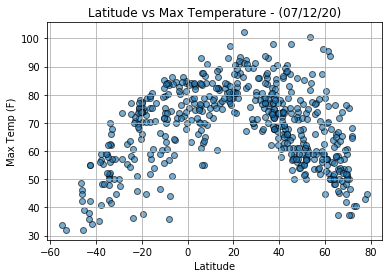

In [23]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Max Temp' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Max Temp (F)'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Max Temperature - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("Fig1_Lat_v_Temp.png")

## Latitude vs. Humidity Plot

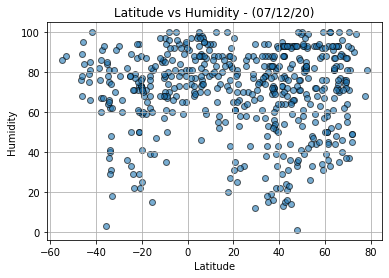

In [24]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Humidity' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Humidity'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Humidity - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Fig2_Lat_v_Hum.png")

## Latitude vs. Cloudiness Plot

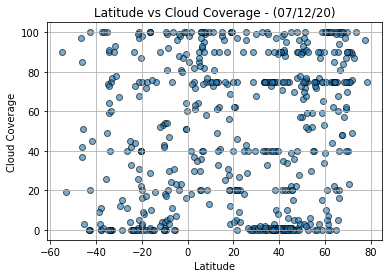

In [25]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Cloud Coverage'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Cloud Coverage - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.grid()
plt.savefig("Fig3_Lat_v_Cloud.png")

## Latitude vs. Wind Speed Plot

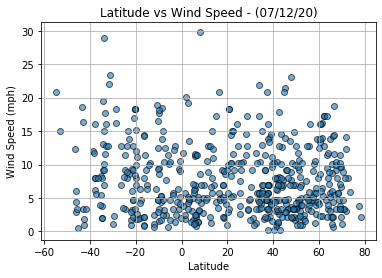

In [26]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Wind Speed'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Wind Speed - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Fig4_Lat_v_Wind.png")

## Linear Regression

In [27]:
# OPTIONAL: Create a function to create Linear Regression plots
def regress_func(x_axis, y_axis, xlabel, ylabel, table_name, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope*x_axis+intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    plt.savefig(fig_name)
    print(f"The R-squared value is {rvalue*rvalue}")

In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = (clean_city_df.loc[clean_city_df['Latitude'] > 0])
southern_df = (clean_city_df.loc[clean_city_df['Latitude'] <= 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.33903879931315545


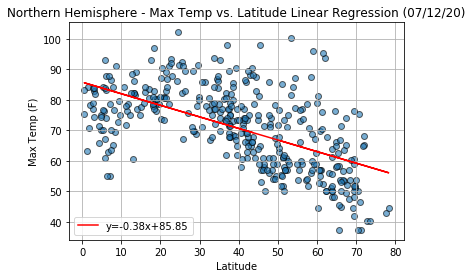

In [29]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})", "Fig5_NH_Lat_v_Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.4659850985225317


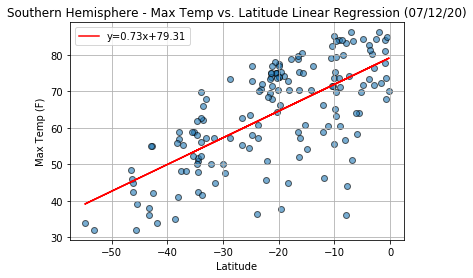

In [30]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig6_SH_Lat_v_Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.010460419510637996


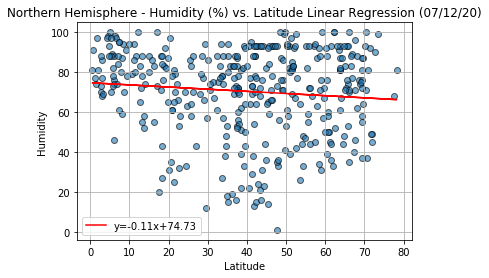

In [31]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig7_NH_Lat_v_Hum")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.013005390098846098


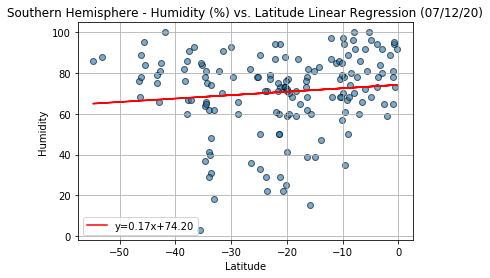

In [32]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig8_SH_Lat_v_Hum")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.0013826835003588039


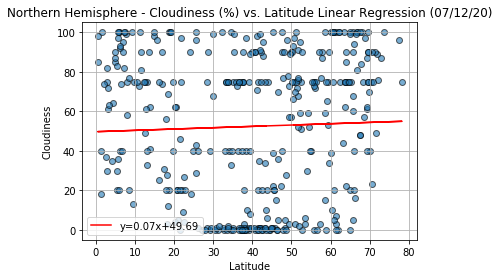

In [33]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig9_NH_Lat_v_Cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.0036611681230420065


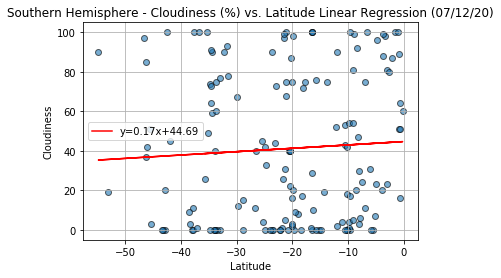

In [34]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig10_SH_Lat_v_Cloud")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 3.2926435532026005e-06


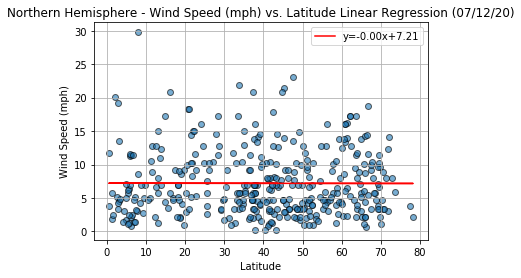

In [35]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig11_NH_Lat_v_Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.0333559278063667


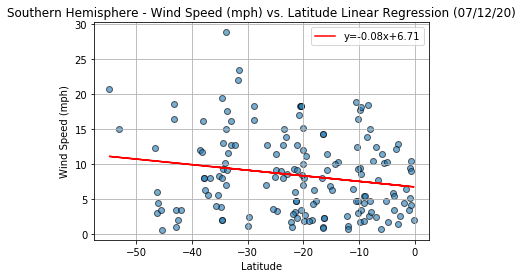

In [36]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig12_SH_Lat_v_Wind")